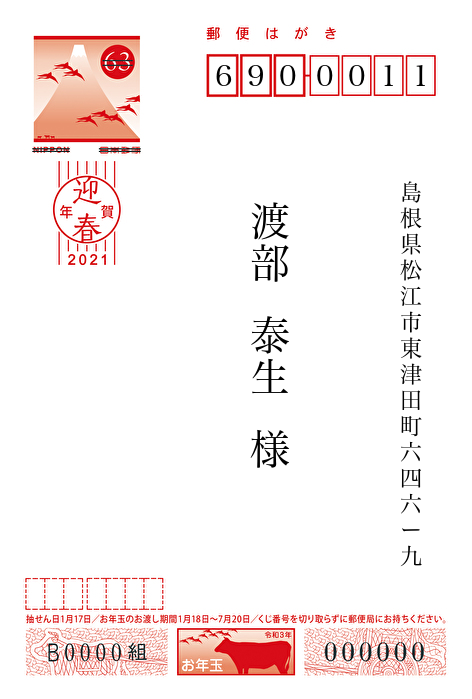

In [11]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import pandas as pd
import os
import img2pdf

atena_df = pd.read_csv("address.csv",na_filter=False)
atena_df.columns = ["index", "sei","mei", "address1","address2","postcode"]
class Atena:
  postcode=None
  address1=None
  address2=None
  sei_name=None
  mei_name=None

  name_vertical_space = 42
  name_interval_space = 30
  name_start_top = 200
  name_start_left = 250
  
  address_vertical_space = 26
  address_start_top = 180
  address2_start_top = 180
  address_start_left = 400
  address2_start_left = 350

  postcode_space = 32
  postcode_top = 60
  postcode_left1 = 215

  summer_interval = 30
  name_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 40)
  address_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 22)
  postcode_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 30)
  plane_img = Image.open("./img/muji.jpg")
  drawnImg = ImageDraw.Draw(plane_img)

  def __init__(
    self,
    postcode=None,
    address1=None,
    sei_name=None,
    mei_name=None,
    address2=None
  ):
    self.postcode=postcode
    self.address1=address1
    self.address2=address2
    self.sei_name=sei_name
    self.mei_name=mei_name

  def DrawPostcode(self):
    postcode_list = list(str(self.postcode))
    for i in range(0,3):
      self.drawnImg.text((self.postcode_left1+self.postcode_space*i,self.postcode_top),postcode_list[i],"black",font=self.postcode_font)
    for i in range(3,7):
      self.drawnImg.text((316+32*(i-3),60),postcode_list[i],"black",font=self.postcode_font)

  def DrawName(self):
    sei_list = list(self.sei_name)
    mei_list = list(self.mei_name)
    for i in range(len(sei_list)):
      self.drawnImg.text((self.name_start_left,self.name_start_top+i*self.name_vertical_space),sei_list[i],"black",font=self.name_font)
    for i in range(len(mei_list)):
      self.drawnImg.text((self.name_start_left,(self.name_start_top+len(sei_list)*self.name_vertical_space)+self.name_interval_space+self.name_vertical_space*i),mei_list[i],"black",font=self.name_font)
    
    self.drawnImg.text((self.name_start_left,(self.name_start_top+len(sei_list)*self.name_vertical_space)+self.name_interval_space+self.name_vertical_space*len(sei_list)+self.summer_interval),"様","black",font=self.name_font)
  
  def DrawAddress(self):
    is_address2 = False
    if self.address2 == '':
      is_address2 = False
    else:
      is_address2 = True
    address1_list = list(self.address1)
    address2_list = list(self.address2)
    for i in range(len(address1_list)):
      self.drawnImg.text(xy=(self.address_start_left,self.address_start_top + i * self.address_vertical_space),text=address1_list[i],fill="black",font=self.address_font)
    
    if is_address2:
      for i in range(len(address2_list)):
        self.drawnImg.text((self.address2_start_left,self.address2_start_top + i * self.address_vertical_space),address2_list[i],"black",font=self.address_font)
    
  def SaveImage(self):
    self.plane_img.save(f"./created_dir/{self.mei_name}{self.sei_name}.jpg")

  def Testfunc(self):
    self.DrawName()
    self.DrawPostcode()
    self.DrawAddress()
    self.SaveImage()
    return self.plane_img

atena_ins = Atena(
  sei_name=atena_df.sei[0],
  mei_name=atena_df.mei[0],
  address1=atena_df.address1[0],
  address2=atena_df.address2[0],
  postcode=str(atena_df.postcode[0])
)

# with open(pdf_filename,"wb") as f:
#   # 画像フォルダの中にあるPNGファイルを取得し配列に追加、バイナリ形式でファイルに書き込む
#   f.write(img2pdf.convert([Image.open(png_Folder+j).filename for j in os.listdir(png_Folder)if j.endswith(extension)]))

pdf_FileName = "./output.pdf" # 出力するPDFの名前
png_Folder = "./created_dir/" # 画像フォルダ
extension  = ".jpg" # 拡張子がPNGのものを対象

with open(pdf_FileName,"wb") as f:
  # 画像フォルダの中にあるPNGファイルを取得し配列に追加、バイナリ形式でファイルに書き込む
  f.write(img2pdf.convert([Image.open(png_Folder+j).filename for j in os.listdir(png_Folder)if j.endswith(extension)]))

In [17]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import pandas as pd
import os
import img2pdf

atena_df = pd.read_csv("address.csv",na_filter=False)
atena_df.columns = ["index", "sei","mei", "address1","address2","postcode"]
class Atena:
  postcode=None
  address1=None
  address2=None
  sei_name=None
  mei_name=None
  img=None

  name_vertical_space = 42
  name_interval_space = 30
  name_start_top = 200
  name_start_left = 250
  
  address_vertical_space = 26
  address_start_top = 180
  address2_start_top = 180
  address_start_left = 400
  address2_start_left = 350

  postcode_space = 32
  postcode_top = 60
  postcode_left1 = 215

  summer_interval = 30
  name_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 40)
  address_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 22)
  postcode_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 30)
  plane_img=None
  drawnImg=None
  

  def __init__(
    self,
    postcode=None,
    address1=None,
    sei_name=None,
    mei_name=None,
    address2=None,
    img=None
  ):
    self.postcode=postcode
    self.address1=address1
    self.address2=address2
    self.sei_name=sei_name
    self.mei_name=mei_name
    self.plane_img=img
    self.drawnImg = ImageDraw.Draw(self.plane_img)
  def DrawPostcode(self):
    postcode_list = list(str(self.postcode))
    for i in range(0,3):
      self.drawnImg.text((self.postcode_left1+self.postcode_space*i,self.postcode_top),postcode_list[i],"black",font=self.postcode_font)
    for i in range(3,7):
      self.drawnImg.text((316+32*(i-3),60),postcode_list[i],"black",font=self.postcode_font)

  def DrawName(self):
    sei_list = list(self.sei_name)
    mei_list = list(self.mei_name)
    for i in range(len(sei_list)):
      self.drawnImg.text((self.name_start_left,self.name_start_top+i*self.name_vertical_space),sei_list[i],"black",font=self.name_font)
    for i in range(len(mei_list)):
      self.drawnImg.text((self.name_start_left,(self.name_start_top+len(sei_list)*self.name_vertical_space)+self.name_interval_space+self.name_vertical_space*i),mei_list[i],"black",font=self.name_font)
    
    self.drawnImg.text((self.name_start_left,(self.name_start_top+len(sei_list)*self.name_vertical_space)+self.name_interval_space+self.name_vertical_space*len(sei_list)+self.summer_interval),"様","black",font=self.name_font)
  
  def DrawAddress(self):
    is_address2 = False
    if self.address2 == '':
      is_address2 = False
    else:
      is_address2 = True
    address1_list = list(self.address1)
    address2_list = list(self.address2)
    for i in range(len(address1_list)):
      self.drawnImg.text(xy=(self.address_start_left,self.address_start_top + i * self.address_vertical_space),text=address1_list[i],fill="black",font=self.address_font)
    
    if is_address2:
      for i in range(len(address2_list)):
        self.drawnImg.text((self.address2_start_left,self.address2_start_top + i * self.address_vertical_space),address2_list[i],"black",font=self.address_font)
    
  def SaveImage(self):
    self.plane_img.save(f"./created_dir/{self.mei_name}{self.sei_name}.jpg")

  def Testfunc(self):
    self.DrawName()
    self.DrawPostcode()
    self.DrawAddress()
    self.SaveImage()
    return self.plane_img
  
  def main(self):
    self.DrawName()
    self.DrawPostcode()
    self.DrawAddress()
    self.SaveImage()
for i in range(len(atena_df.index)):
  plane_img = Image.open("./img/muji.jpg")
  atena_ins = Atena(
    sei_name=atena_df.sei[i],
    mei_name=atena_df.mei[i],
    postcode=atena_df.postcode[i],
    address1=atena_df.address1[i],
    address2=atena_df.address2[i],
    img=plane_img
  )
  atena_ins.main()

# with open(pdf_filename,"wb") as f:
#   # 画像フォルダの中にあるPNGファイルを取得し配列に追加、バイナリ形式でファイルに書き込む
#   f.write(img2pdf.convert([Image.open(png_Folder+j).filename for j in os.listdir(png_Folder)if j.endswith(extension)]))

pdf_FileName = "./output.pdf" # 出力するPDFの名前
png_Folder = "./created_dir/" # 画像フォルダ
extension  = ".jpg" # 拡張子がPNGのものを対象

with open(pdf_FileName,"wb") as f:
  # 画像フォルダの中にあるPNGファイルを取得し配列に追加、バイナリ形式でファイルに書き込む
  f.write(img2pdf.convert([Image.open(png_Folder+j).filename for j in os.listdir(png_Folder)if j.endswith(extension)]))